In [5]:
options(max.print = 10)

In [7]:
mandelbrot_naive <- function(xmin=-2, xmax=2, nx=500,
                             ymin=-1.5, ymax=1.5, ny=500,
                             n=100, showplot=TRUE,
                             cols=colorRampPalette(c("blue","yellow",
                                                     "red","black"))(11)){
  
  # variables
  x <- seq(xmin, xmax, length.out=nx)
  y <- seq(ymin, ymax, length.out=ny)
  c <- outer(x,y*1i,FUN="+")
  z <- matrix(0.0, nrow=length(x), ncol=length(y))
  k <- matrix(0.0, nrow=length(x), ncol=length(y))
  
  for (rep in 1:n) { 
    for (i in 1:nx) { 
      for (j in 1:ny) { 
        if(Mod(z[i,j]) < 2) {
          z[i,j] <- z[i,j]^2 + c[i,j]
          k[i,j] <- k[i,j] + 1
        }
      }
    }
  }
  
  if (showplot==TRUE){
    image(x,y,k,col=cols,xlab="Re(c)",ylab="Im(c)")
  }else{
    return(k)
    }
}

In [8]:
mandelbrot_vectorized <- function(xmin=-2, xmax=2, nx=500,
                                  ymin=-1.5, ymax=1.5, ny=500,
                                  n=100, showplot=TRUE,
                                  cols=colorRampPalette(c("blue","yellow",
                                                          "red","black"))(11)){
  
  # variables
  x <- seq(xmin, xmax, length.out=nx)
  y <- seq(ymin, ymax, length.out=ny)
  c <- outer(x,y*1i,FUN="+")
  z <- matrix(0.0, nrow=length(x), ncol=length(y))
  k <- matrix(0.0, nrow=length(x), ncol=length(y))
  
  for (rep in 1:n){ 
    index <- which(Mod(z) < 2)
    z[index] <- z[index]^2 + c[index]
    k[index] <- k[index] + 1
  }
  if (showplot==TRUE){
    image(x,y,k,col=cols, xlab="Re(c)", ylab="Im(c)")
  }else{
    return(k)
    }
}

In [9]:
compare_runtimes <- function(){
  system.time(mandelbrot_naive(showplot=F))
  system.time(mandelbrot_vectorized(showplot=F))
}

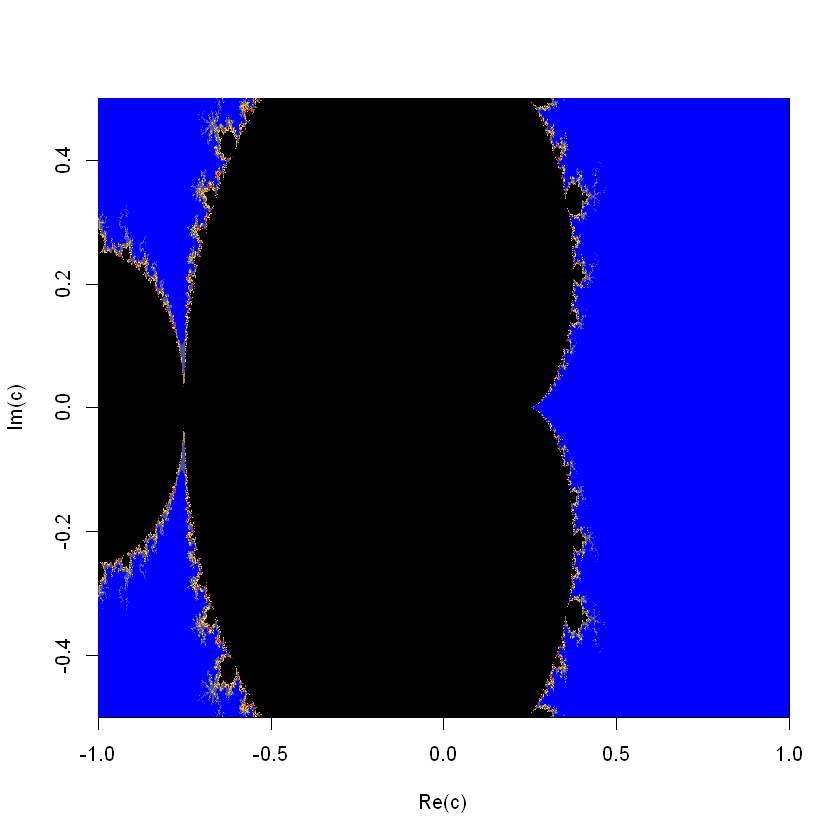

In [15]:
mandelbrot_vectorized(n = 300, ny = 800, nx = 800,
                      xmin = -1, xmax = 1, ymin = -0.5,
                      ymax = 0.5)